In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

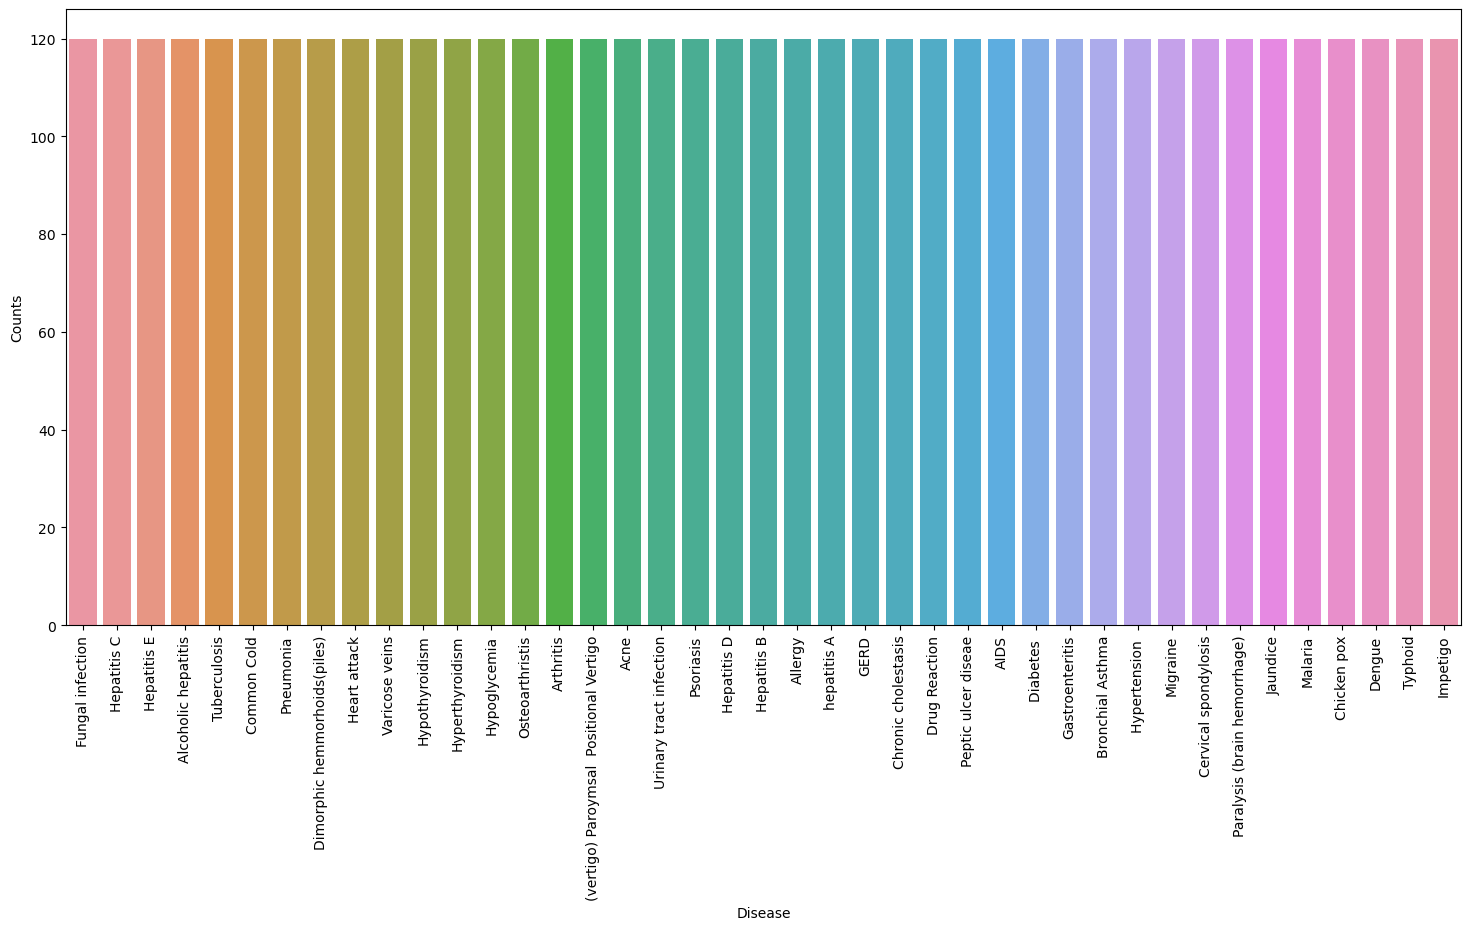

In [3]:
DATA_PATH = "C:/Users/ACER 623/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

disease_counts = data['prognosis'].value_counts()
temp_df = pd.DataFrame({"Disease": disease_counts.index, "Counts":disease_counts.values})

plt.figure(figsize=(18,8))
sns.barplot(x='Disease', y='Counts', data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [4]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
itching,1,0,1,1,1,0,1,1,1,1
skin_rash,1,1,0,1,1,1,0,1,1,1
nodal_skin_eruptions,1,1,1,0,1,1,1,0,1,1
continuous_sneezing,0,0,0,0,0,0,0,0,0,0
shivering,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,0,0,0,0,0,0,0,0,0,0
blister,0,0,0,0,0,0,0,0,0,0
red_sore_around_nose,0,0,0,0,0,0,0,0,0,0
yellow_crust_ooze,0,0,0,0,0,0,0,0,0,0


In [5]:
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

In [6]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
itching,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
skin_rash,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
nodal_skin_eruptions,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
continuous_sneezing,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1
shivering,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
blister,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
red_sore_around_nose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
yellow_crust_ooze,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


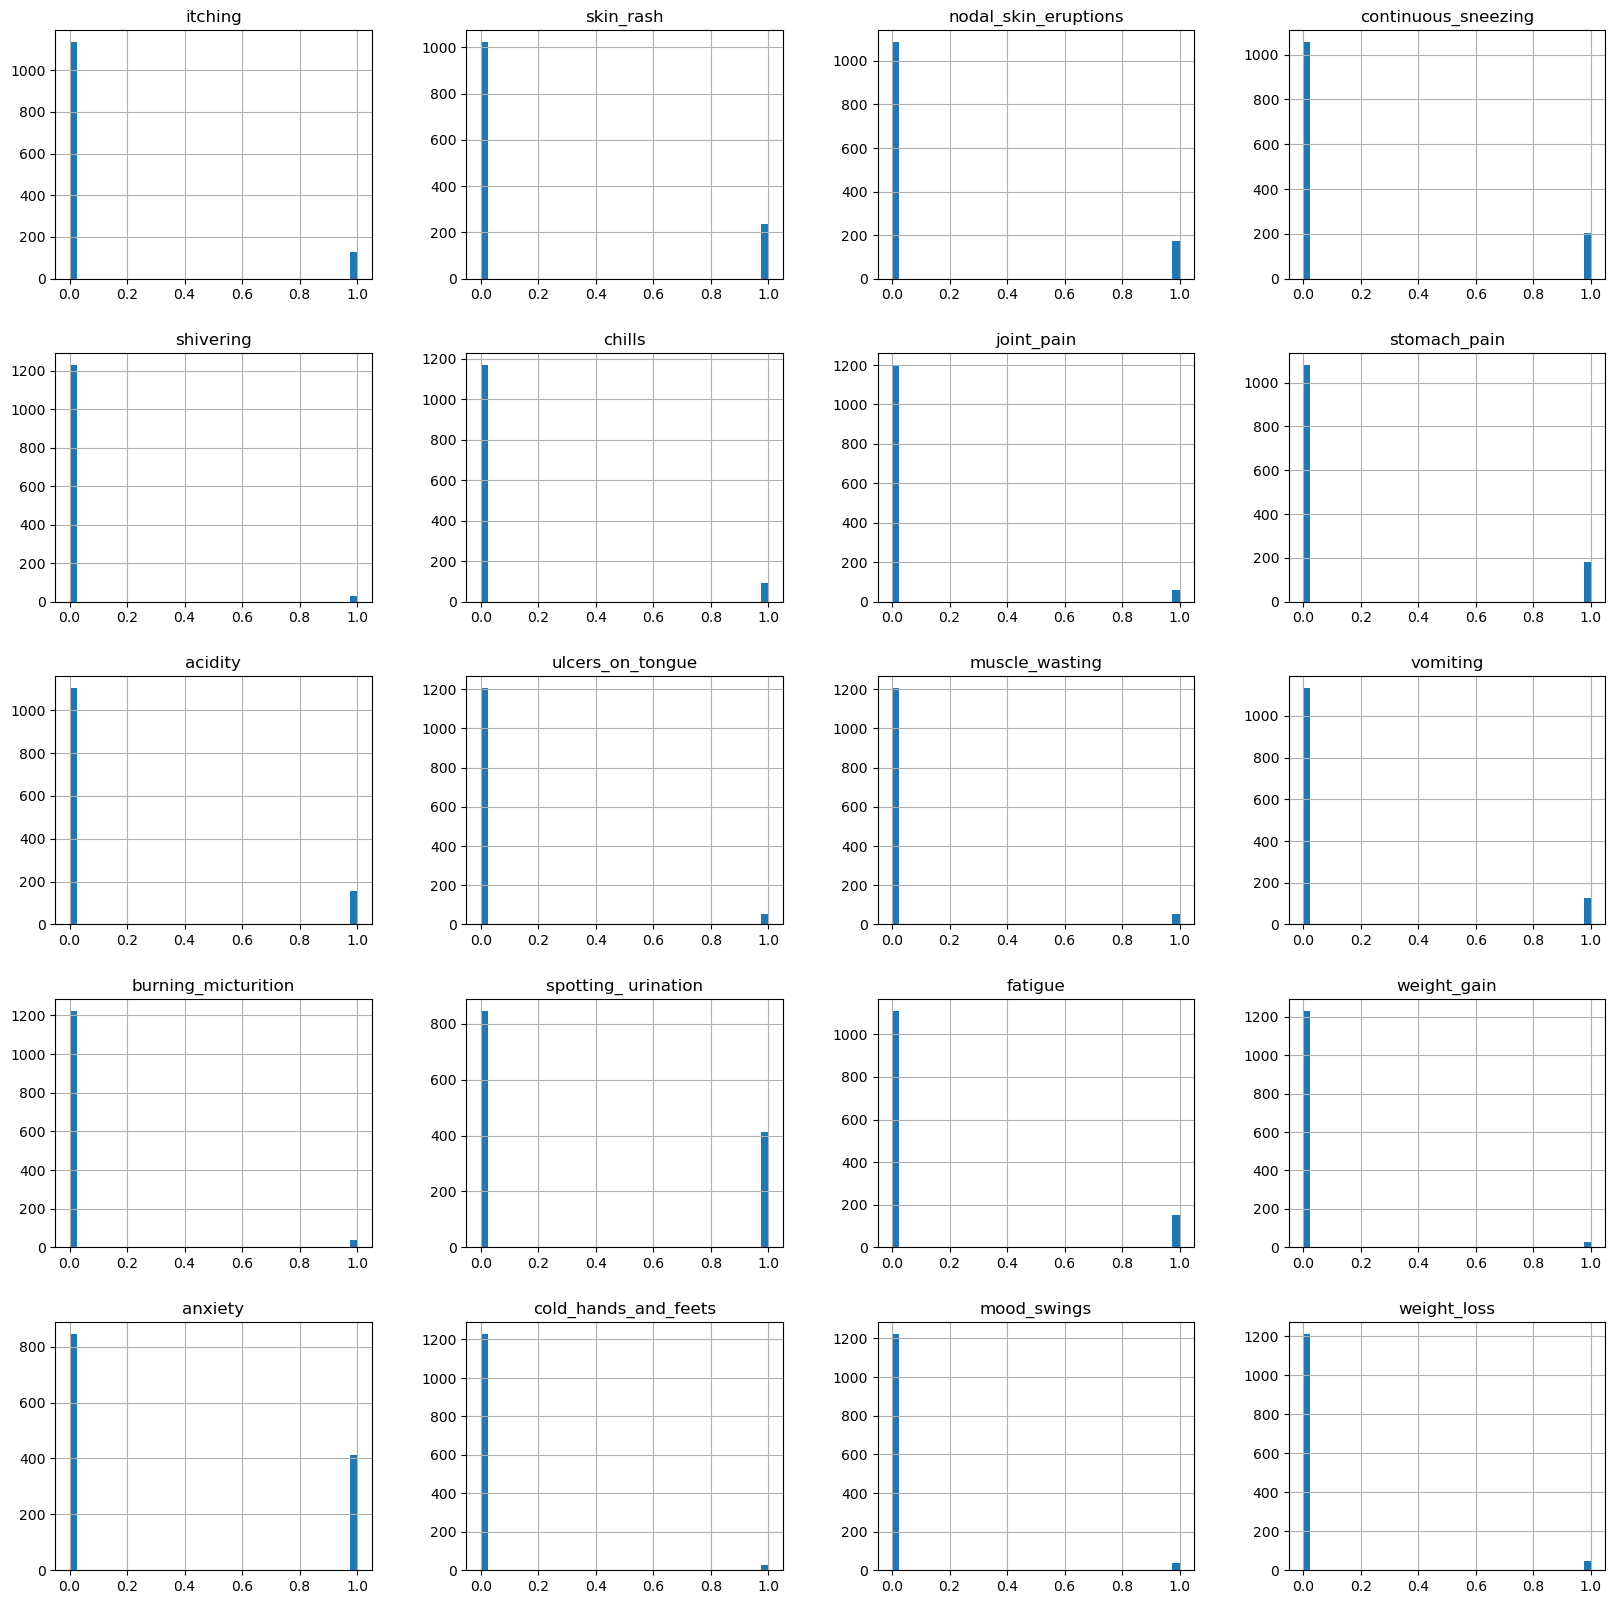

In [67]:
data.hist(bins=40, figsize=(20,20))
plt.show()

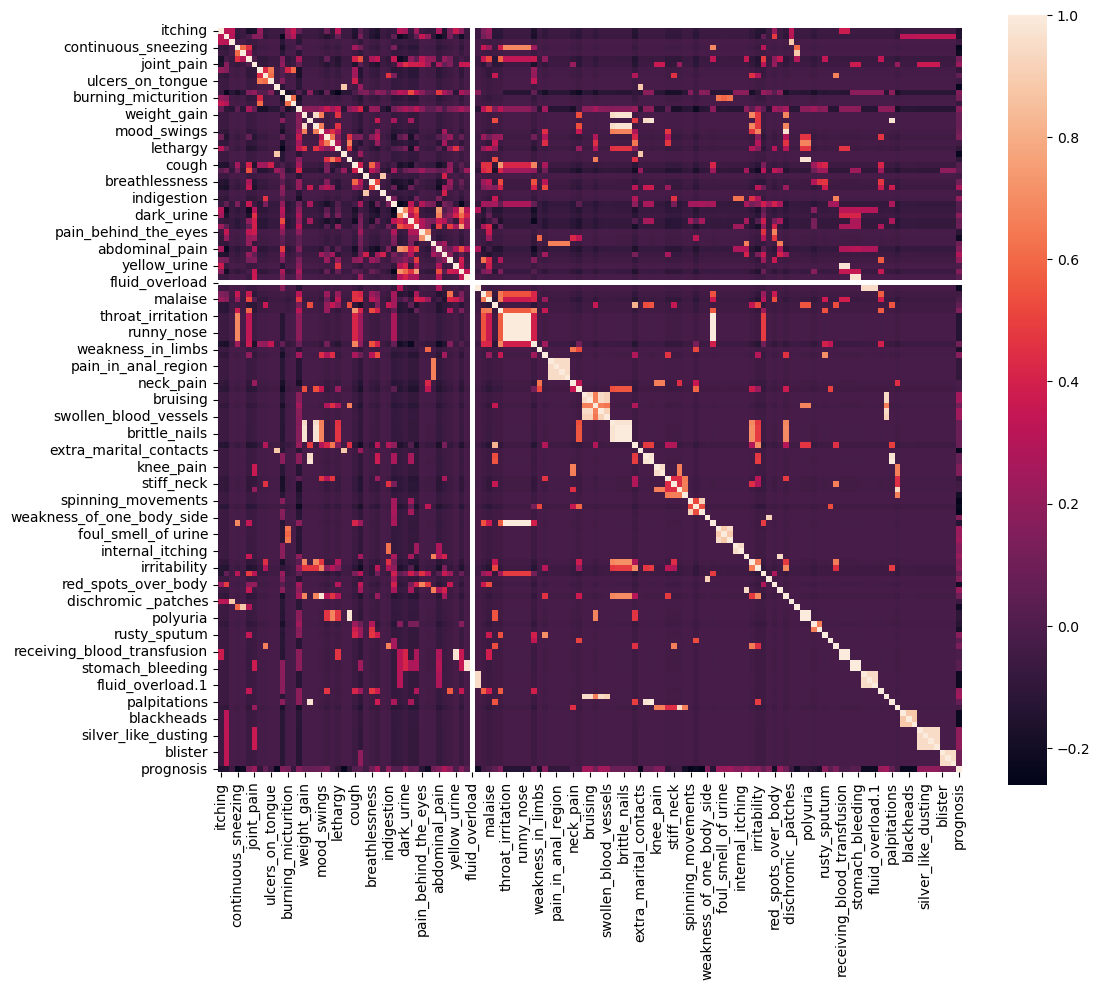

In [8]:
corrmat = data.corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

In [9]:
X = data.drop('prognosis', axis=1)
y = data.prognosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [10]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "RandomForest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
RandomForest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


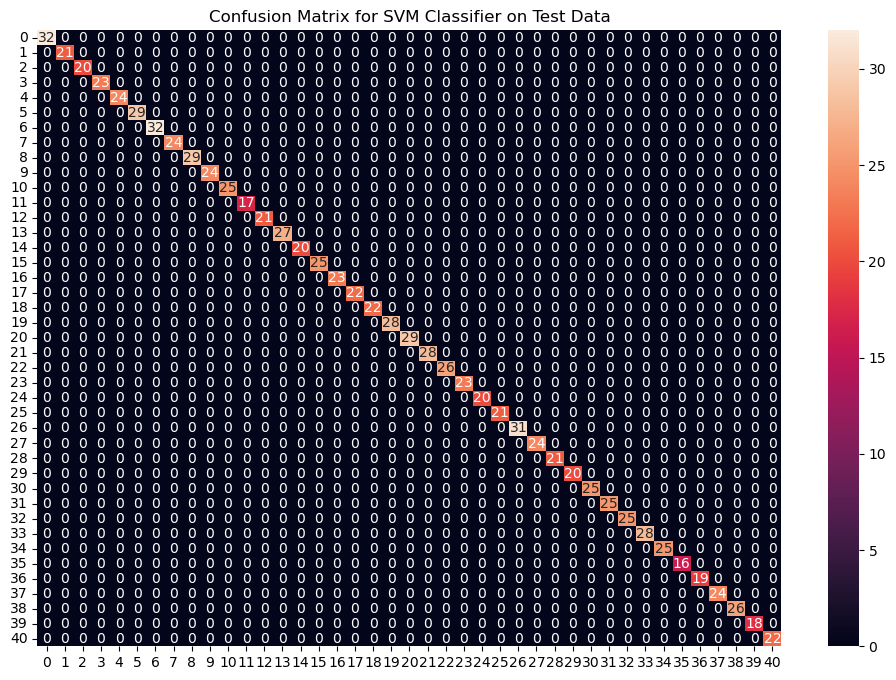

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


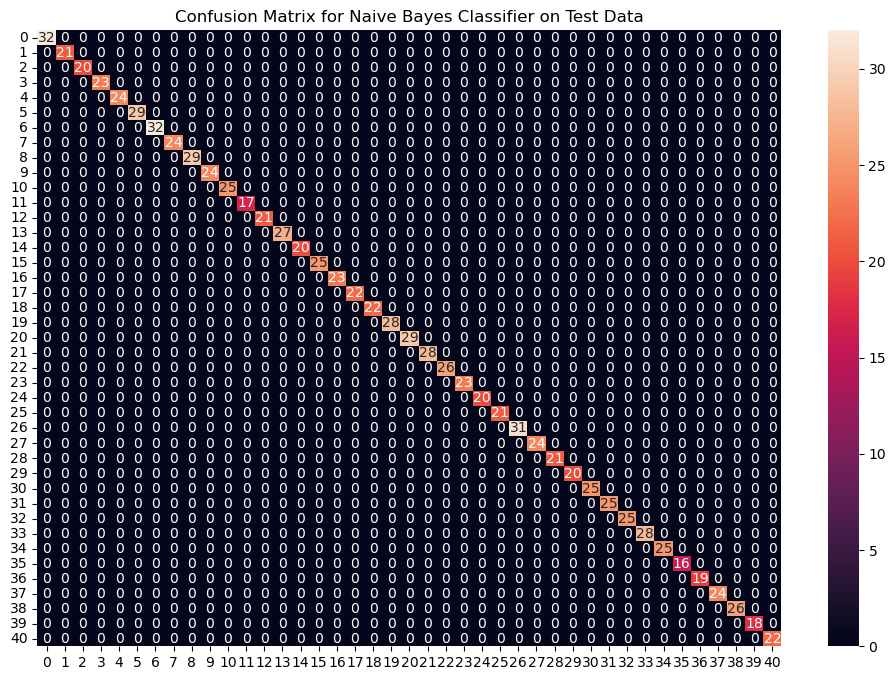

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


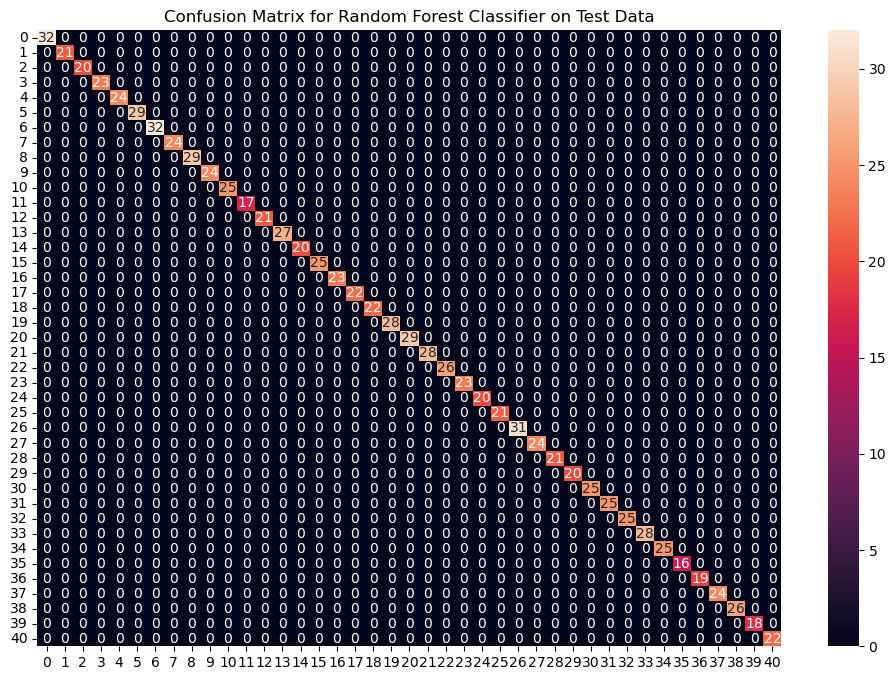

In [11]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
 
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()
 

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
 
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read CSV File
test_data = pd.read_csv("C:/Users/ACER 623/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/Testing.csv")

# Drop 'cough' Column from test_X
test_X = test_data.drop('prognosis', axis=1)

# Assuming 'count' is a column you want to transform using the encoder
# Replace 'count' with the correct column name if needed
encoder = LabelEncoder()
test_Y = encoder.fit_transform(test_data['count'])


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\pandas\core\indexes\base.py", line 3653, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas\_libs\index.pyx", line 147, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 176, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'count'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ACER 623\AppData\Local\Temp\ipykernel_15920\2432575318.py", line 13, in <module>
    test_Y = enco

In [25]:
# Training the models on whole data
models = [SVC(), GaussianNB(), RandomForestClassifier(random_state=18)]
preds = []
for i in range(3):
    models[i] = models[i].fit(X, y)
    preds.append(models[i].predict(test_X)) 

final_preds = [mode([i,j,k])[0][0] for i,j,k in zip(*preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")
 
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ACER 623\AppData\Local\Temp\ipykernel_15920\2027618634.py", line 6, in <module>
    preds.append(models[i].predict(test_X))
                ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\svm\_base.py", line 818, in predict
    y = super().predict(X)
        ^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\svm\_base.py", line 431, in predict
    X = self._validate_for_predict(X)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\svm\_base.py", line 611, in _validate_for_predict
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 579, in _validate_data
    self._check_feature_names(X, reset=reset)
  File "D:\anaconda\Lib\site-packages\sklearn\base.py"

In [32]:
DATA_PATH = "C:/Users/ACER 623/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/Testing.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

disease_counts = data['prognosis'].value_counts()
temp_df = pd.DataFrame({"Disease": disease_counts.index, "Counts":disease_counts.values})

plt.figure(figsize=(18,8))
sns.barplot(x='Disease', y='Counts', data=temp_df)
plt.xticks(rotation=90)
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\pandas\core\indexes\base.py", line 3653, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas\_libs\index.pyx", line 147, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 176, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'prognosis'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ACER 623\AppData\Local\Temp\ipykernel_15920\1805886563.py", line 4, in <module>
    disease_co

In [33]:
df = pd.read_csv("C:/Users/ACER 623/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/Testing.csv")
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Drug Reaction


In [42]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImpute
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X, y, test_X, and test_Y are defined earlier

# Training the models on the whole training data
models = [SVC(), GaussianNB(), RandomForestClassifier(random_state=1)]
preds = []

for i in range(3):
    models[i] = models[i].fit(X, y)
    preds.append(models[i].predict(test_X))

# Combine predictions using mode
final_preds = [mode([i, j, k])[0][0] for i, j, k in zip(*preds)]

# Evaluate the accuracy on the test dataset
accuracy = accuracy_score(test_Y, final_preds)
print(f"Accuracy on Test dataset by the combined model: {accuracy * 100:.2f}%")

# Create and display the confusion matrix
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ACER 623\AppData\Local\Temp\ipykernel_15920\2717036230.py", line 3, in <module>
    from sklearn.impute import SimpleImpute
ImportError: cannot import name 'SimpleImpute' from 'sklearn.impute' (D:\anaconda\Lib\site-packages\sklearn\impute\__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\IPython\cor

In [43]:
test_data = pd.read_csv("C:/Users/ACER 623/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/Testing.csv")
test_X = test_data.drop('prognosis', axis=1)
test_Y = encoder.transform(test_data.prognosis)
# Training the models on whole data
models = [SVC(), GaussianNB(), RandomForestClassifier(random_state=18)]
preds = []
for i in range(3):
    models[i] = models[i].fit(X, y)
    preds.append(models[i].predict(test_X)) 

final_preds = [mode([i,j,k])[0][0] for i,j,k in zip(*preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")
 
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ACER 623\AppData\Local\Temp\ipykernel_15920\1863689242.py", line 3, in <module>
    test_Y = encoder.transform(test_data.prognosis)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py", line 131, in transform
    check_is_fitted(self)
  File "D:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 1462, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimat

In [57]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from statistics import mode
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
test_data = pd.read_csv("C:/Users/ACER 623/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/Testing.csv")

# Assuming 'prognosis' is the target column
X = test_data.drop('prognosis', axis=1)
y = LabelEncoder().fit_transform(test_data['prognosis'])

# Training the models on the whole data
models = [SVC(), GaussianNB(), RandomForestClassifier(random_state=18)]
preds = []

for i in range(3):
    models[i] = models[i].fit(X, y)
    preds.append(models[i].predict(X))

final_preds = [mode([i, j, k])[0][0] for i, j, k in zip(*preds)]

# Transform the 'prognosis' column of the test data using the fitted LabelEncoder
test_Y = LabelEncoder().fit(y).transform(test_data['prognosis'])

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))

sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ACER 623\AppData\Local\Temp\ipykernel_15920\3061683241.py", line 23, in <module>
    models[i] = models[i].fit(X, y)
                ^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "D:\anaconda\L

In [65]:
symptoms = X.columns.values
 
# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}
 
# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
     
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
         
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
     
    # generating individual outputs
    models_prediction = []
    for i in range(3):
        models_prediction.append(data_dict["predictions_classes"][models[i].predict(input_data)[0]]) 
     
    # making final prediction by taking mode of all predictions
    final_prediction = mode([*models_prediction])[0][0]
    predictions = {
        "rf_model_prediction": models_prediction[0],
        "naive_bayes_prediction": models_prediction[1],
        "svm_model_prediction": models_prediction[2],
        "final_prediction":final_prediction
    }
    return predictions
 
# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ACER 623\AppData\Local\Temp\ipykernel_15920\1467933049.py", line 11, in <module>
    "predictions_classes":encoder.classes_
                          ^^^^^^^^^^^^^^^^
AttributeError: 'LabelEncoder' object has no attribute 'classes_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\IPython\core\ultratb.py", line

In [66]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from statistics import mode
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
test_data = pd.read_csv("C:/Users/ACER 623/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/Testing.csv")

# Assuming 'prognosis' is the target column
X = test_data.drop('prognosis', axis=1)
y = LabelEncoder().fit_transform(test_data['prognosis'])

# Training the models on the whole data
models = [SVC(), GaussianNB(), RandomForestClassifier(random_state=18)]
preds = []

for i in range(3):
    models[i] = models[i].fit(X, y)
    preds.append(models[i].predict(X))

final_preds = [mode([i, j, k])[0][0] for i, j, k in zip(*preds)]

# Transform the 'prognosis' column of the test data using the fitted LabelEncoder
test_Y = LabelEncoder().fit(y).transform(test_data['prognosis'])

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))

sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ACER 623\AppData\Local\Temp\ipykernel_15920\3061683241.py", line 23, in <module>
    models[i] = models[i].fit(X, y)
                ^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "D:\anaconda\L

In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from statistics import mode  # Import the mode function
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
test_data = pd.read_csv("D:/python/Testing.csv")

# Assuming 'prognosis' is the target column
X = test_data.drop('prognosis', axis=1)

# Use SimpleImputer to fill in missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode the target column
y = LabelEncoder().fit_transform(test_data['prognosis'])

# Training the models on the whole data
models = [SVC(), GaussianNB(), RandomForestClassifier(random_state=18)]
preds = []

for i in range(3):
    models[i] = models[i].fit(X_imputed, y)  # Use X_imputed instead of X
    preds.append(models[i].predict(X_imputed))

final_preds = [mode([i, j, k])[0][0] for i, j, k in zip(*preds)]

# Transform the 'prognosis' column of the test data using the fitted LabelEncoder
test_Y = LabelEncoder().fit(y).transform(test_data['prognosis'])

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))

sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ACER 623\AppData\Local\Temp\ipykernel_6784\2535520098.py", line 33, in <module>
    final_preds = [mode([i, j, k])[0][0] for i, j, k in zip(*preds)]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ACER 623\AppData\Local\Temp\ipykernel_6784\2535520098.py", line 33, in <listcomp>
    final_preds = [mode([i, j, k])[0][0] for i, j, k in zip(*preds)]
                   ~~~~~~~~~~~~~~~^^^
IndexError: invalid index to scalar variable.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\

In [3]:
pip install scipy


In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import mode  # Import mode from scipy instead of statistics
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
test_data = pd.read_csv("C:/Users/ACER 623/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/Testing.csv")

# Assuming 'prognosis' is the target column
X = test_data.drop('prognosis', axis=1)

# Use SimpleImputer to fill in missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode the target column
y = LabelEncoder().fit_transform(test_data['prognosis'])

# Training the models on the whole data
models = [SVC(), GaussianNB(), RandomForestClassifier(random_state=18)]
preds = []

for i in range(3):
    models[i] = models[i].fit(X_imputed, y)
    preds.append(models[i].predict(X_imputed))

# Use mode from scipy to calculate the mode of the predictions
final_preds = mode(preds, axis=0).mode.flatten()

# Transform the 'prognosis' column of the test data using the fitted LabelEncoder
test_Y = LabelEncoder().fit(y).transform(test_data['prognosis'])

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))

sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ACER 623\AppData\Local\Temp\ipykernel_6784\3687338183.py", line 37, in <module>
    test_Y = LabelEncoder().fit(y).transform(test_data['prognosis'])
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py", line 132, in transform
    y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\validation.py", line 1220, in column_or_1d
    y = check_array(
        ^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sk